SVM tries to maximize the Margin between the data points from the decision boundary

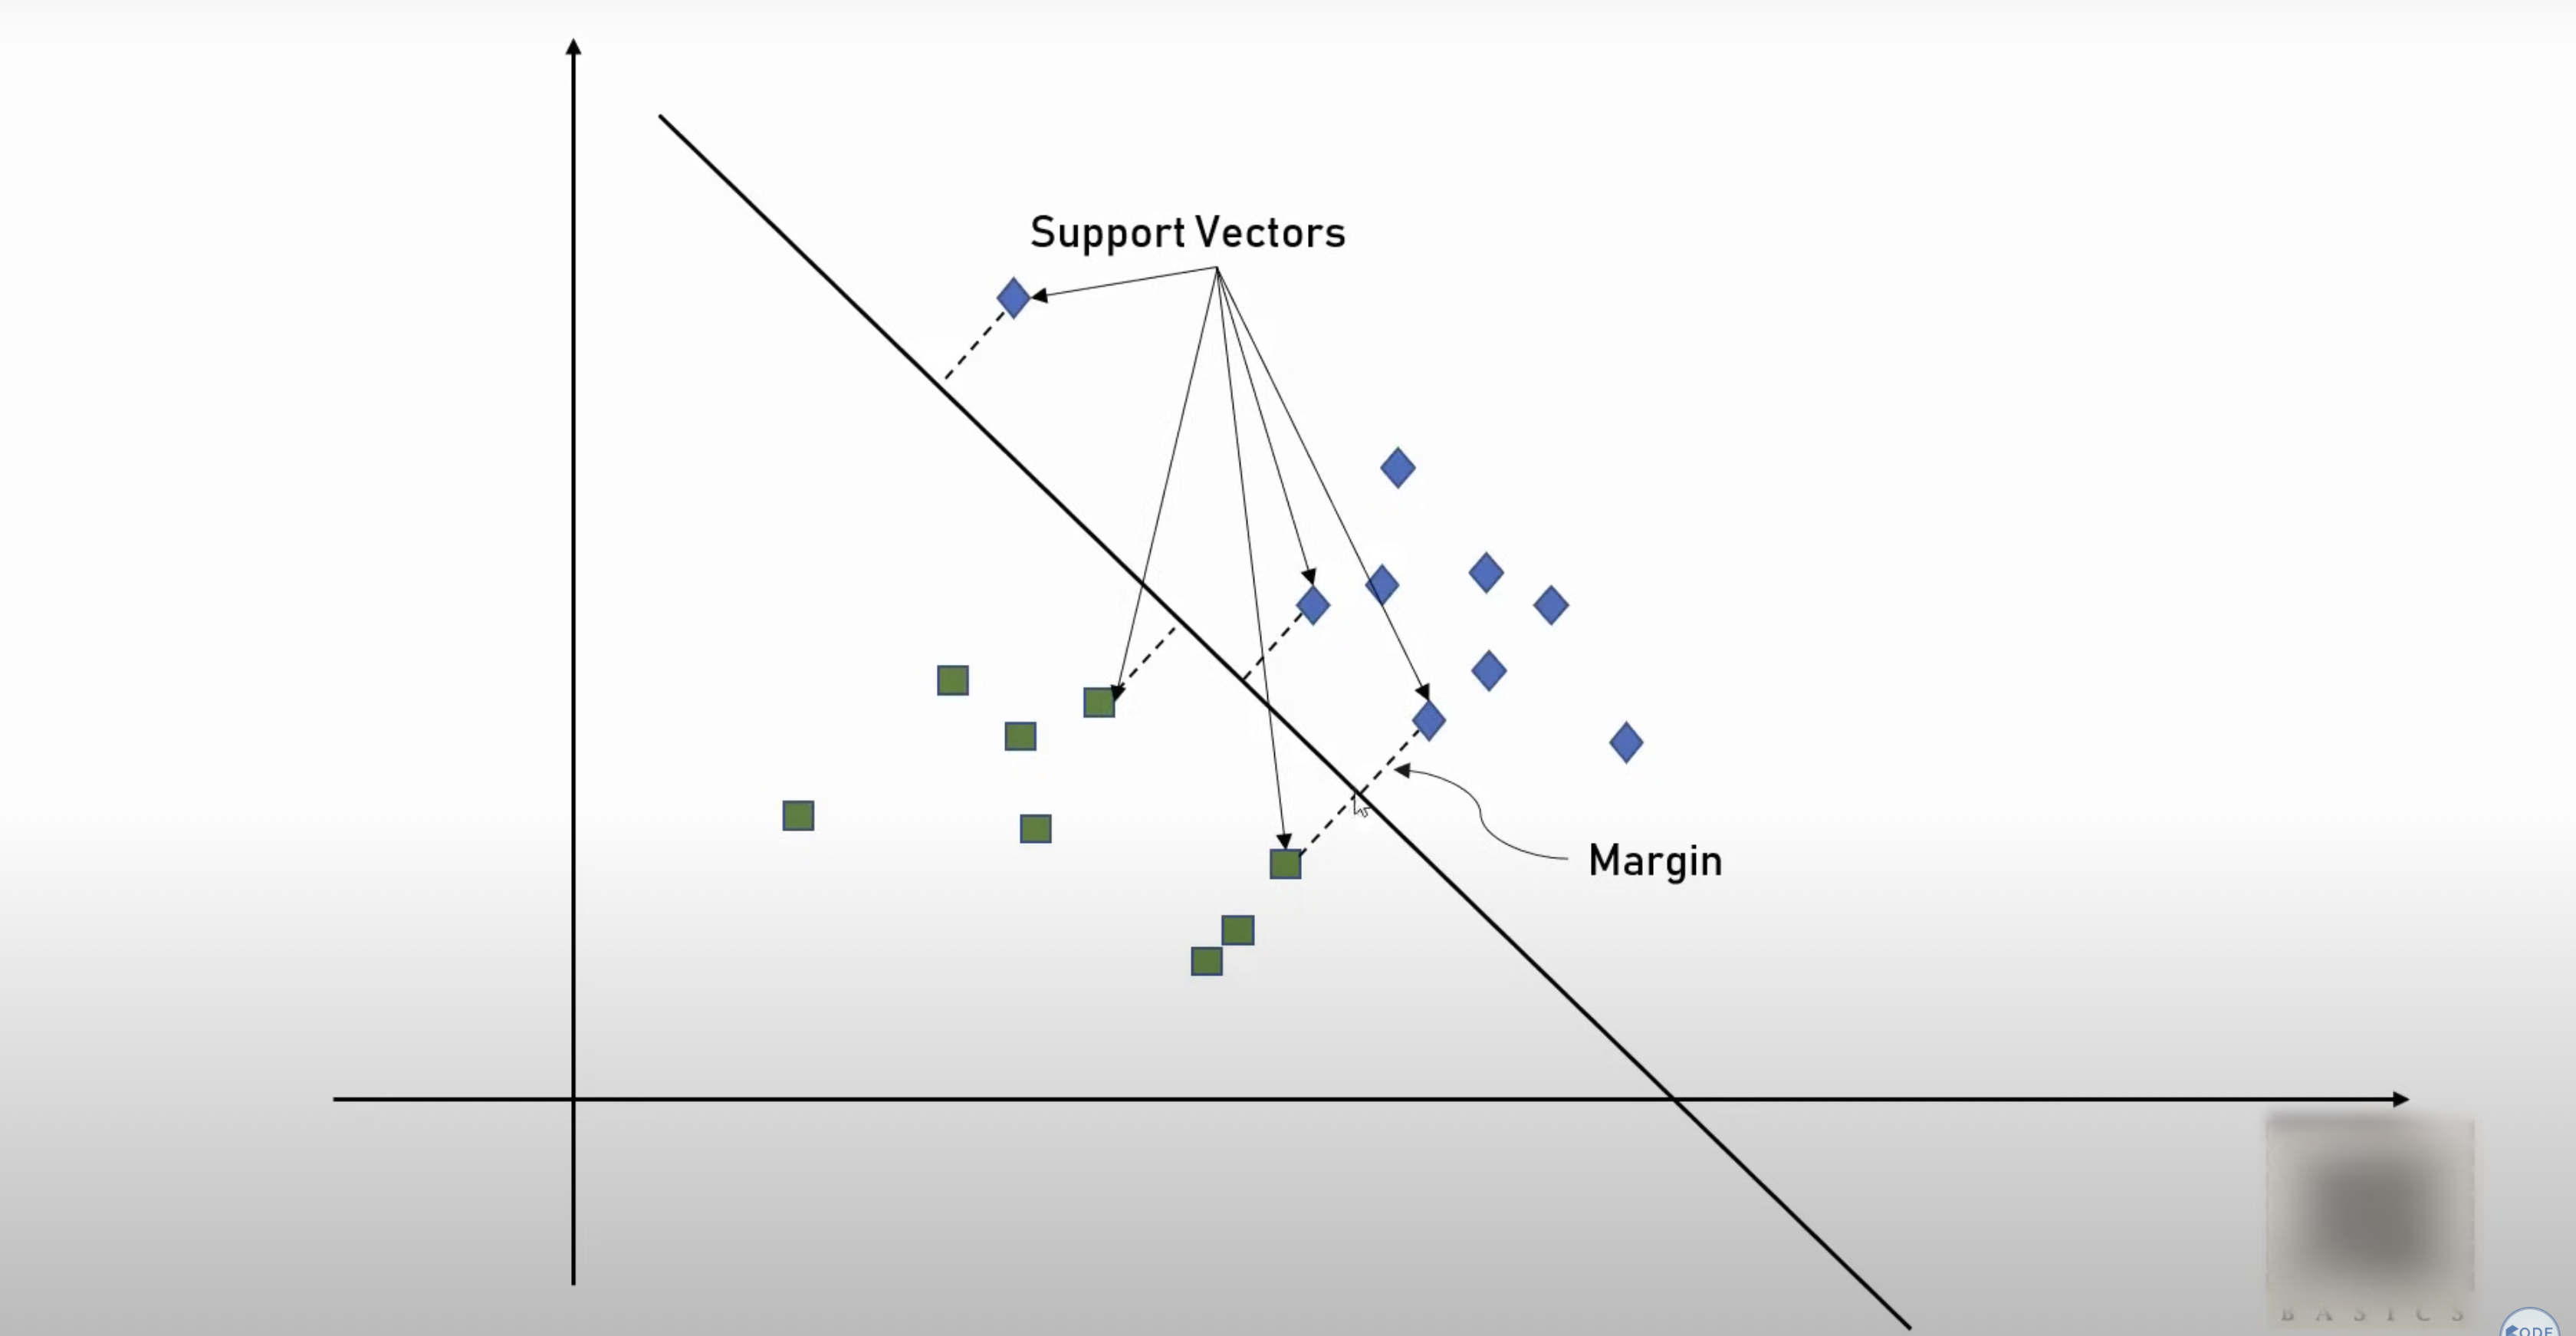

SVM draws a hyper plane in a N dimensional space such that it maximizes the margin between the classification groups.

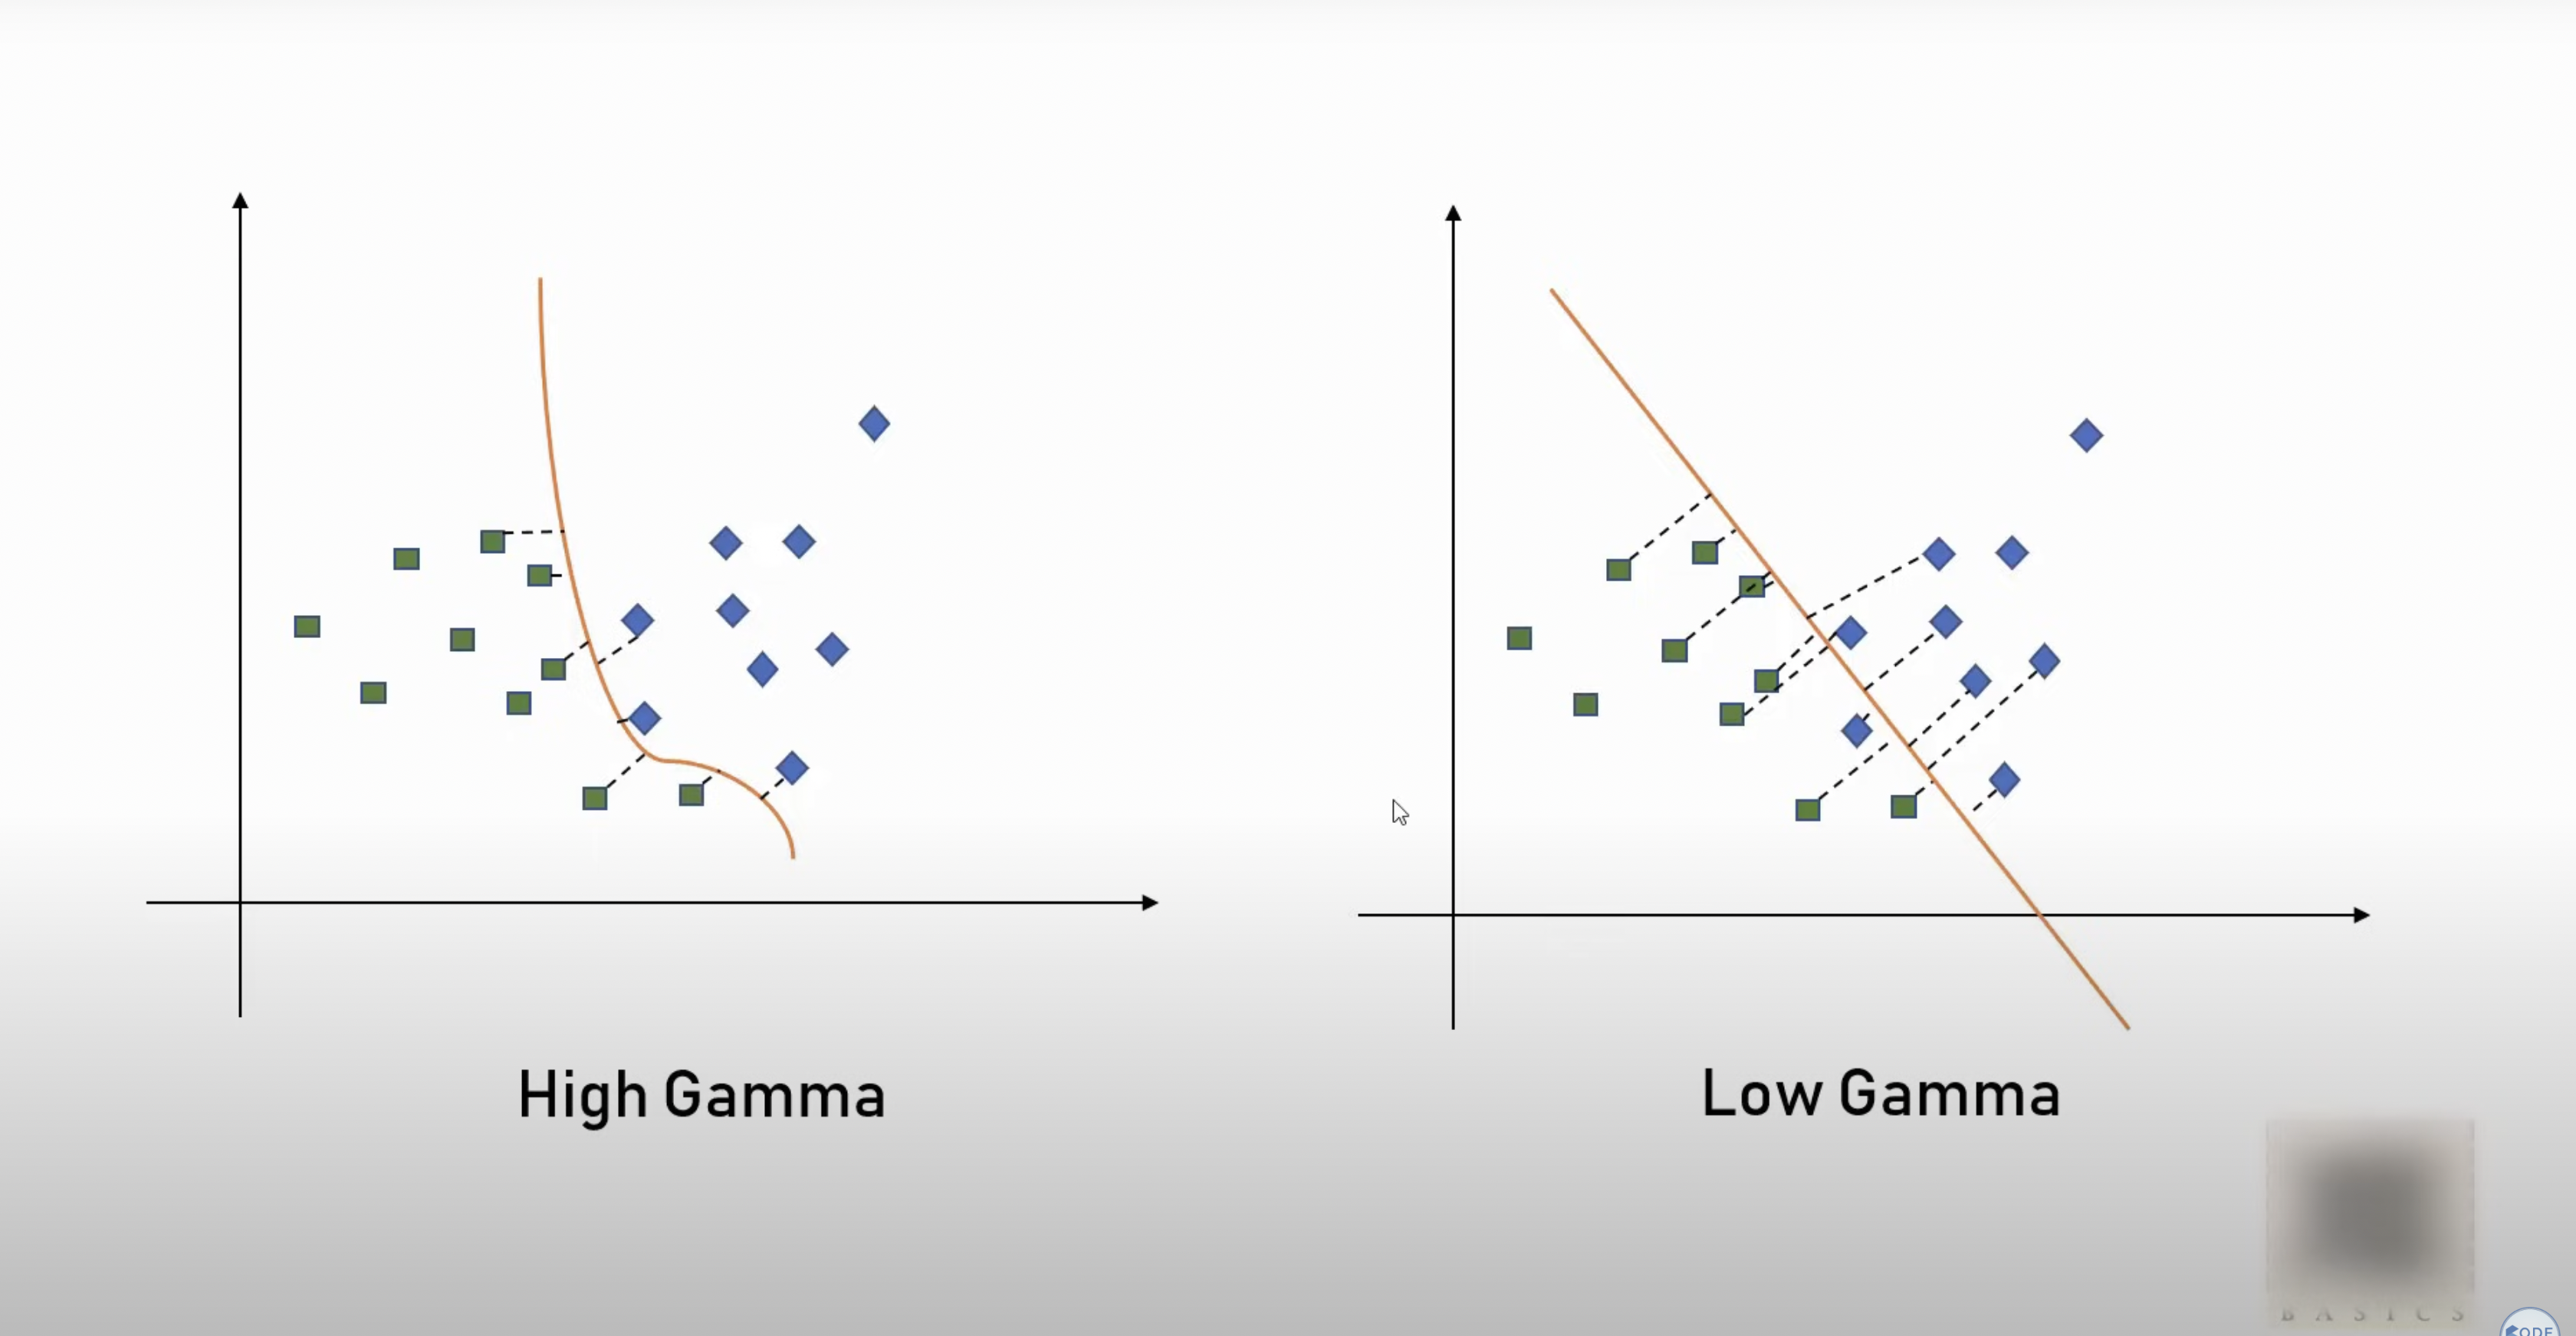

High Gamma means we are considering the nearer data points for decision boundary which is computationally expensive whereas Low Gamma considers far away points

High Regularization can lead to Overfitting
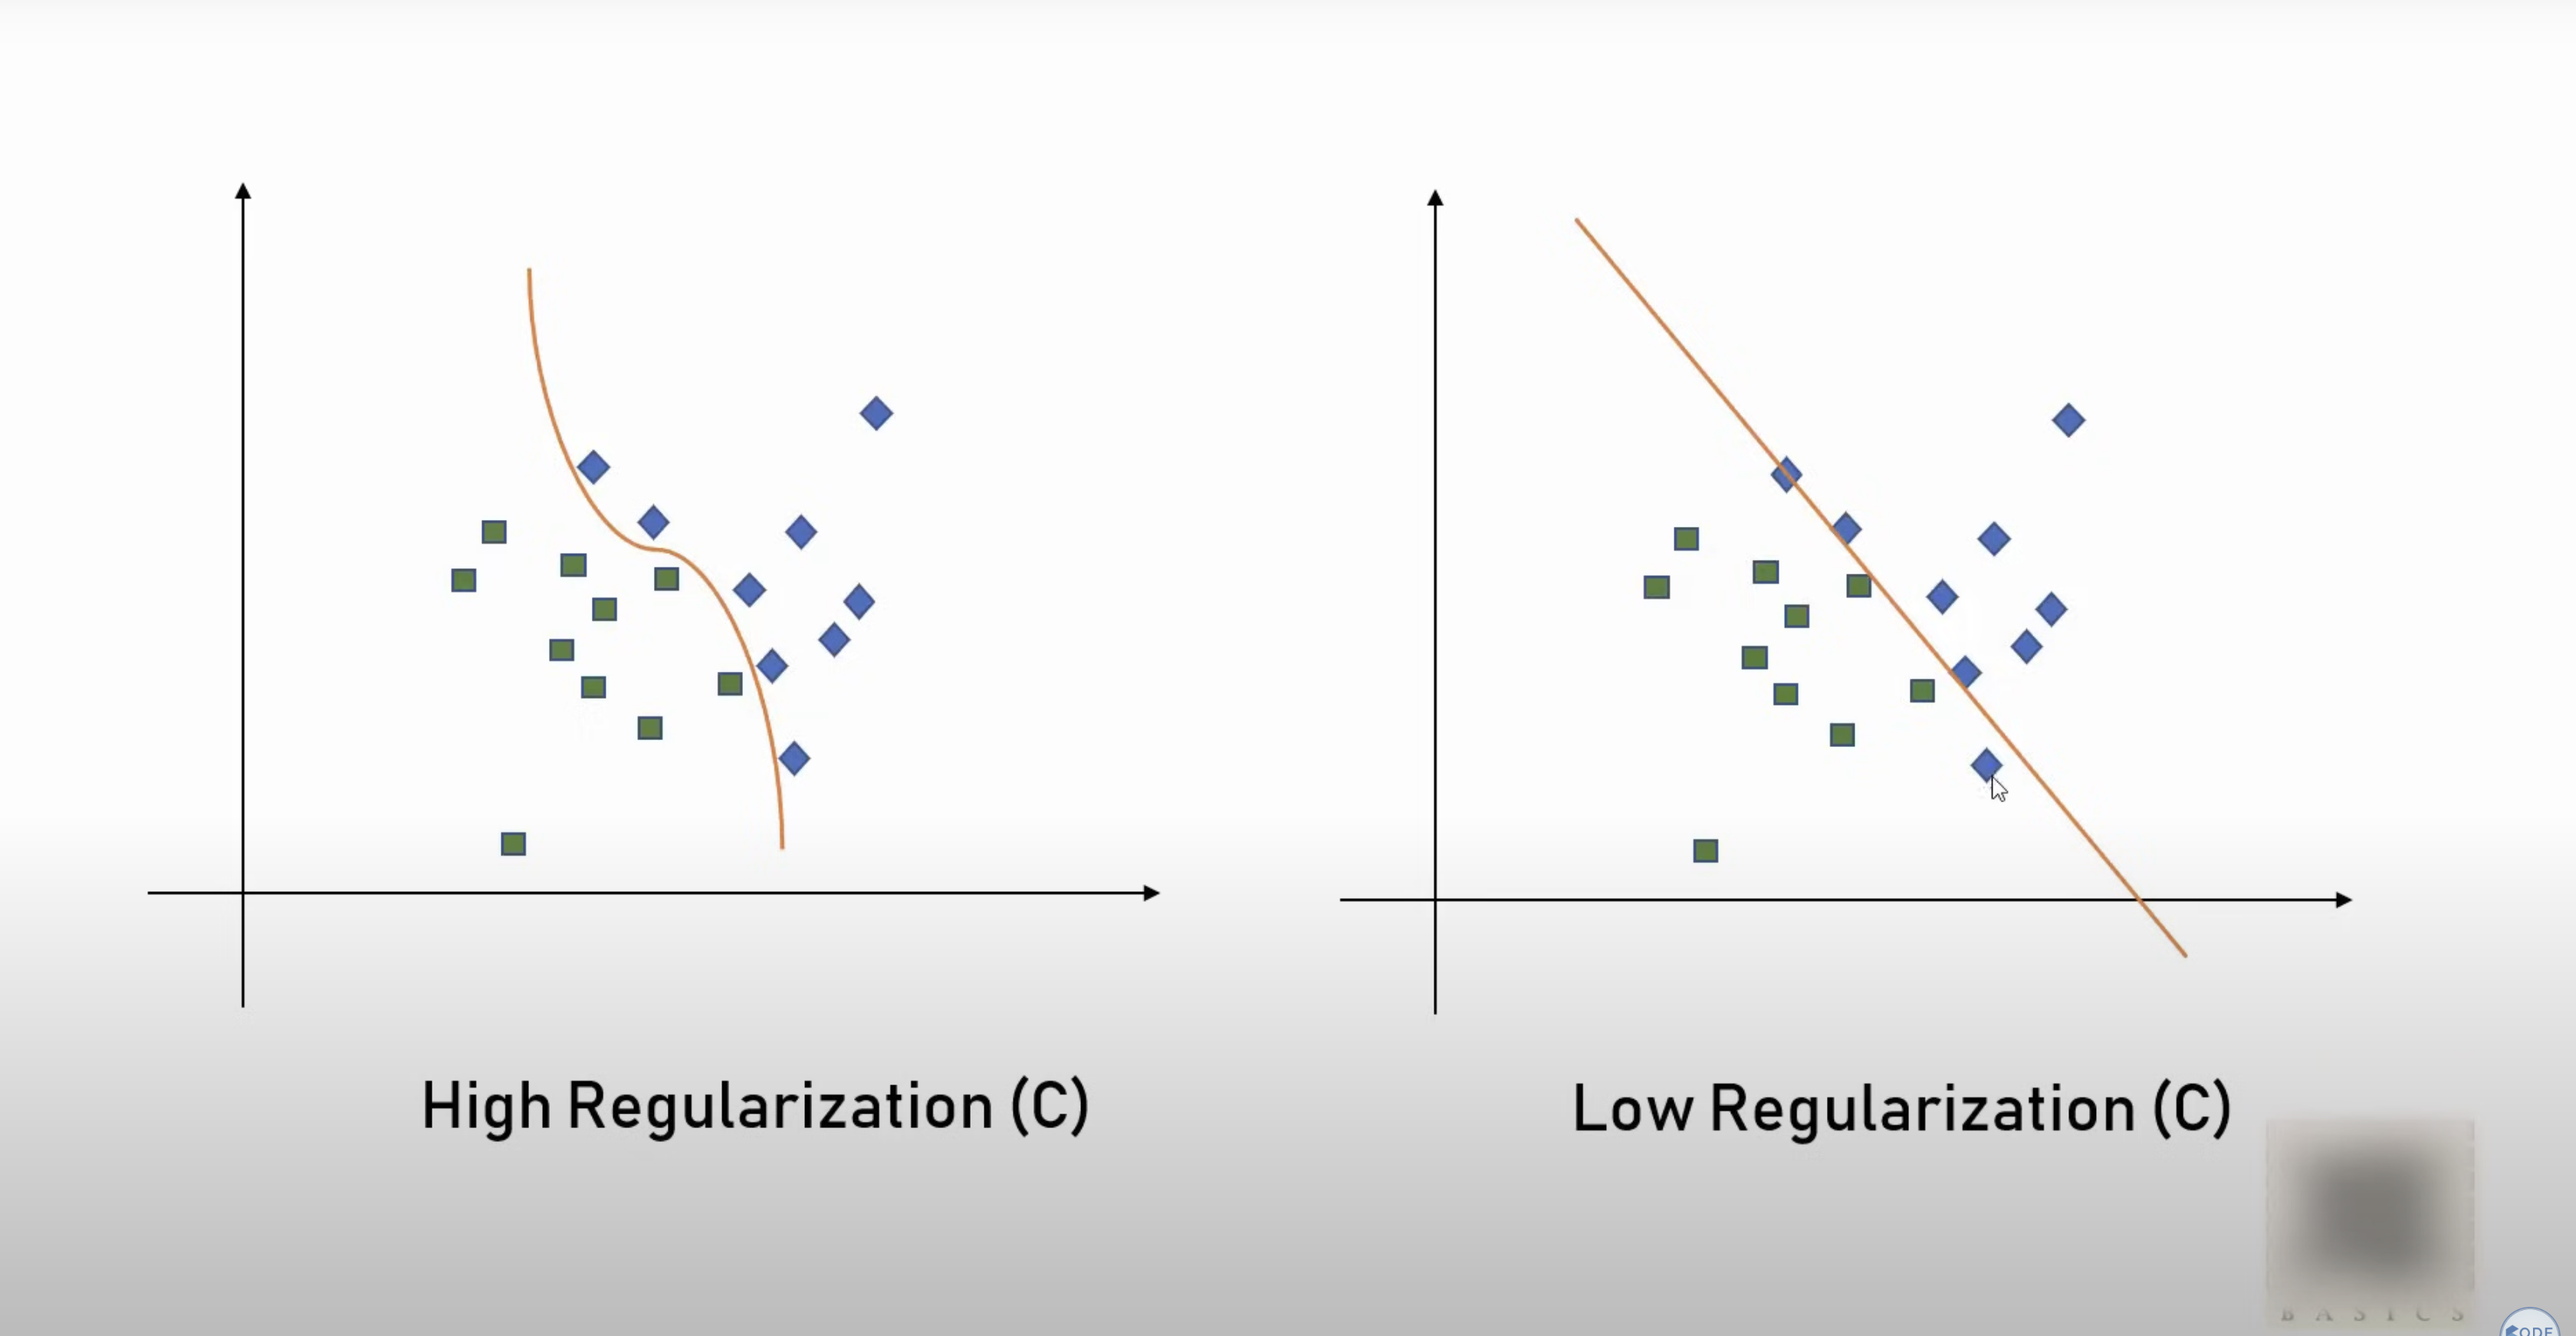

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [9]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [10]:
df0.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

<function matplotlib.pyplot.show(close=None, block=None)>

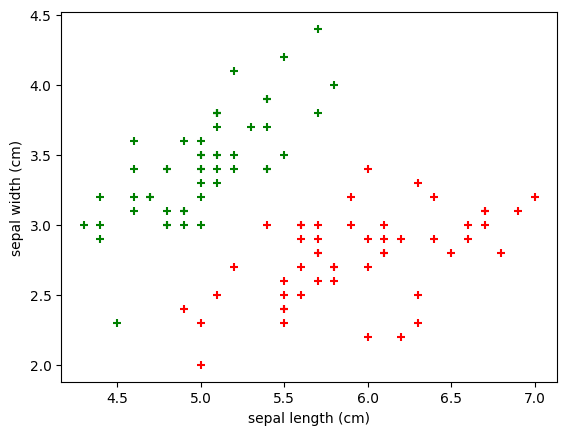

In [11]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

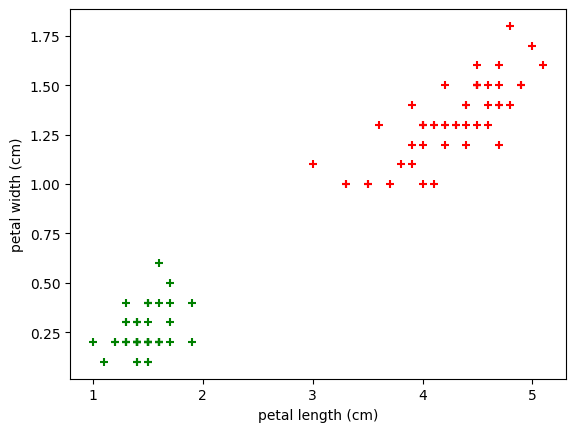

In [12]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show

In [13]:
x = df.drop(['target', 'flower_name'], axis='columns')
x.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [14]:
y = df.target

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
from sklearn.svm import SVC
model = SVC()

In [17]:
model.fit(x_train, y_train)

SVC()

In [18]:
model.predict(x_test)

array([0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 0, 2, 0])

In [19]:
model.score(x_test, y_test)

0.9666666666666667

In [20]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  6]])

Text(95.72222222222221, 0.5, 'Truth')

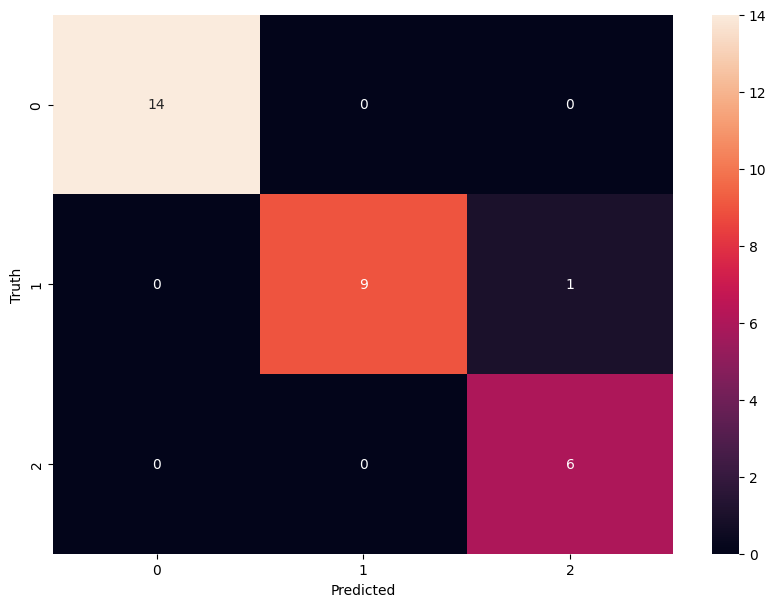

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<Figure size 640x480 with 0 Axes>

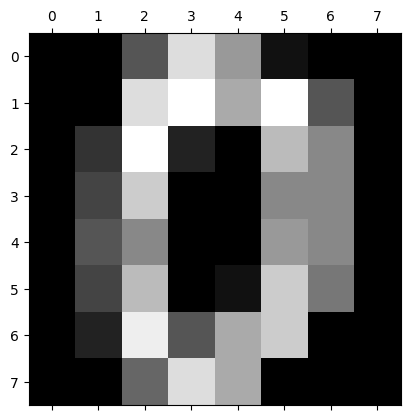

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [27]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [30]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [31]:
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 35]])

Text(95.72222222222221, 0.5, 'Truth')

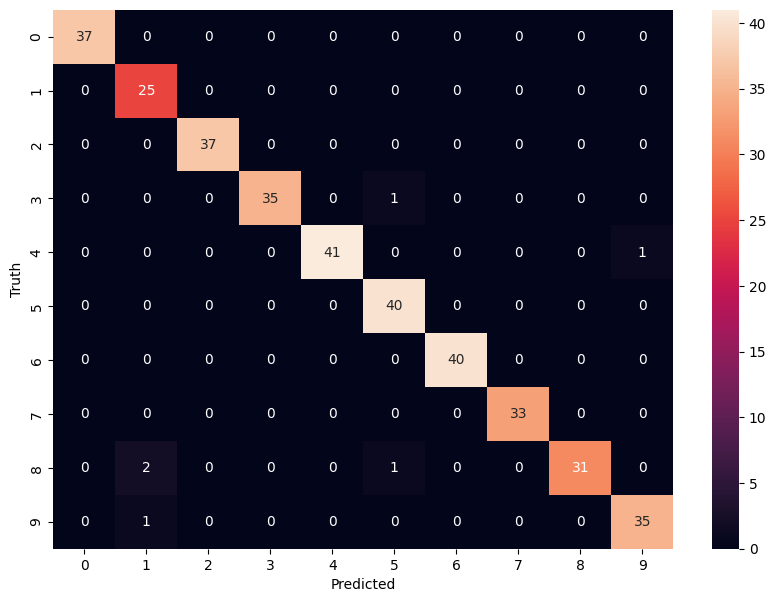

In [32]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
model.score(x_test, y_test)

0.9833333333333333